In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("final_dataset_BFP .csv")

In [3]:
data_types = df.dtypes
print("Data types of each column:\n")
print(data_types)

Data types of each column:

Weight                          float64
Height                          float64
BMI                             float64
Body Fat Percentage             float64
BFPcase                          object
Gender                           object
Age                               int64
BMIcase                          object
Exercise Recommendation Plan      int64
dtype: object


In [4]:
df.head(10)

,Weight,Height,BMI,Body Fat Percentage,BFPcase,Gender,Age,BMIcase,Exercise Recommendation Plan
0,76.811975,1.820521,23.175956,18.281148,Acceptable,Male,29,normal,4
1,77.721154,1.945498,20.534184,13.731021,Fitness,Male,23,normal,4
2,87.558726,1.742754,28.828859,42.304631,Obese,Female,57,over weight,5
3,89.473356,1.758318,28.940017,27.958021,Obese,Male,41,over weight,5
4,69.963943,1.722570,23.578732,16.464478,Fitness,Male,19,normal,4
5,62.913627,1.498504,28.017479,34.200974,Obese,Female,26,over weight,5
6,53.598341,1.864738,15.414007,9.886809,Athletes,Male,33,sever thinness,1
7,105.078061,1.743099,34.583405,50.590086,Obese,Female,63,severe obese,7
8,87.698358,1.818983,26.505403,39.976483,Obese,Female,59,severe obese,7
9,74.798901,1.710349,25.569717,29.433660,Obese,Male,65,over weight,5


In [5]:
# Select the input features and target variable
data_input = df[['Weight', 'Height', 'Gender', 'Age']]
data_output = df['Exercise Recommendation Plan']

In [6]:
# Convert categorical variables to numerical using label encoding
le = LabelEncoder()
data_input = data_input.copy()
data_input.loc[:, 'Gender'] = le.fit_transform(data_input['Gender'])

In [7]:
# Split the data into training and testing sets
X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.25, random_state=3)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2)

# Create the decision tree classifier
model = DecisionTreeClassifier(max_depth=8,random_state=3)

In [8]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (2812, 4)
y_train: (2812,)
------------
X_val: (938, 4)
y_val: (938,)
------------
X_test: (1250, 4)
y_test: (1250,)


In [9]:
# Train the classifier
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)

y_pred_val = model.predict(X_val)

# Make predictions on the testing set
# y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_val, y_pred_val))

Accuracy: 0.903271692745377
Accuracy: 0.8294243070362474


In [10]:
# we are going to try these values
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# we store the accuracy values of our experiments in two lists 
# (for training and validation)
training_accuracy_values = []
validation_accuracy_values = []

# we loop over the max_depth_values
for max_depth_val in max_depth_values:
    
    # create the model
    model = DecisionTreeClassifier(max_depth=max_depth_val, 
                                   random_state=2)
    
    # train the model
    model.fit(X_train, y_train)
    
    # calculate the training and validation accuracy
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    # add these results to the lists
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

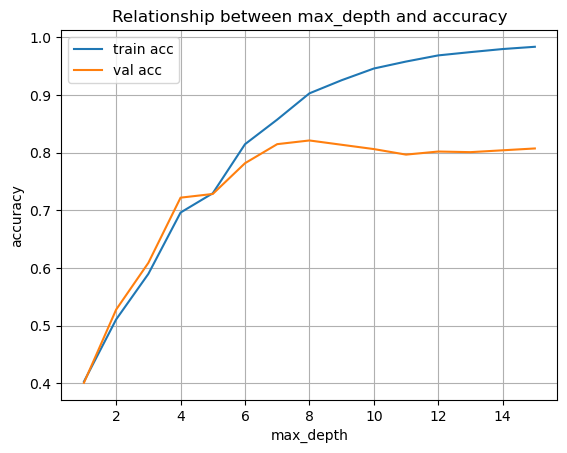

In [12]:
plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.grid(axis='both')
plt.show()

In [13]:
model_best = DecisionTreeClassifier(max_depth=8, random_state=2)
model_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=2)

In [14]:
y_pred_test = model_best.predict(X_test)

In [15]:
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

Test accuracy: 0.8016


In [16]:
import pickle

In [17]:
pickle.dump(model_best, open('decision_tree_model.pkl)','wb'))

In [19]:
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(model_best, f)

In [20]:
# Load the saved model
with open('decision_tree_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [26]:
# New input data (example)
new_input_data = pd.DataFrame({'Weight': [90], 'Height': [170], 'Gender': ['Male'], 'Age': [25]})

# Convert categorical variables to numerical using label encoding
new_input_data_encoded = new_input_data.copy()
new_input_data_encoded['Gender'] = le.transform(new_input_data['Gender'])

# Make predictions using the loaded model
predictions = loaded_model.predict(new_input_data_encoded)

# Print the predictions
print("Predicted Exercise Recommendation Plan:", predictions[0])

Predicted Exercise Recommendation Plan: 4
